In [34]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [35]:
df = pd.read_excel('data2.xlsx')
X = df[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X18','X19','X20','X21','X22','X23']]
y = df["Y"]


In [36]:
print(X)

           X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  X11    X18    X19    X20  \
0       20000   2   2   1  24   2   2  -1  -1   -2   -2      0    689      0   
1      120000   2   2   2  26  -1   2  -1  -1   -1    2      0   1000   1000   
2       90000   2   2   2  34  -1  -1  -1  -1   -1   -1   1518   1500   1000   
3       50000   2   2   1  37  -1  -1  -1  -1   -1   -1   2000   2019   1200   
4       50000   1   2   1  57  -1  -1  -1  -1   -1   -1   2000  36681  10000   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...    ...    ...    ...   
29995  220000   1   3   1  39  -1  -1  -1  -1   -1   -1   8500  20000   5003   
29996  150000   1   3   2  43  -1  -1  -1  -1   -1   -1   1837   3526   8998   
29997   30000   1   2   2  37   4   3   2  -1   -1   -1      0      0  22000   
29998   80000   1   3   1  41   1  -1  -1  -1   -1   -1  85900   3409   1178   
29999   50000   1   2   1  46  -1  -1  -1  -1   -1   -1   2078   1800   1430   

        X21    X22   X23  
0         0 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42)

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train)
y_test_one_hot = tf.keras.utils.to_categorical(y_test)

In [40]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(17,)))
model.add(tf.keras.layers.Dense(6, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="softmax"))
model.add(tf.keras.layers.Dense(2, activation="softmax"))

In [41]:
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [42]:
history = model.fit(X_train_scaled, y_train_one_hot, epochs=50, 
                    validation_data=(X_test_scaled, y_test_one_hot))

Epoch 1/50
750/750 [==============================] - 2s 1ms/step - loss: 0.4972 - accuracy: 0.7884 - val_loss: 0.4502 - val_accuracy: 0.8113
Epoch 2/50
750/750 [==============================] - 1s 988us/step - loss: 0.4473 - accuracy: 0.8131 - val_loss: 0.4451 - val_accuracy: 0.8128
Epoch 3/50
750/750 [==============================] - 1s 1ms/step - loss: 0.4444 - accuracy: 0.8146 - val_loss: 0.4438 - val_accuracy: 0.8110
Epoch 4/50
750/750 [==============================] - 1s 1ms/step - loss: 0.4429 - accuracy: 0.8145 - val_loss: 0.4433 - val_accuracy: 0.8120
Epoch 5/50
750/750 [==============================] - 1s 997us/step - loss: 0.4417 - accuracy: 0.8158 - val_loss: 0.4420 - val_accuracy: 0.8138
Epoch 6/50
750/750 [==============================] - 1s 985us/step - loss: 0.4409 - accuracy: 0.8166 - val_loss: 0.4414 - val_accuracy: 0.8127
Epoch 7/50
750/750 [==============================] - 1s 1ms/step - loss: 0.4400 - accuracy: 0.8174 - val_loss: 0.4406 - val_accuracy: 0.8162


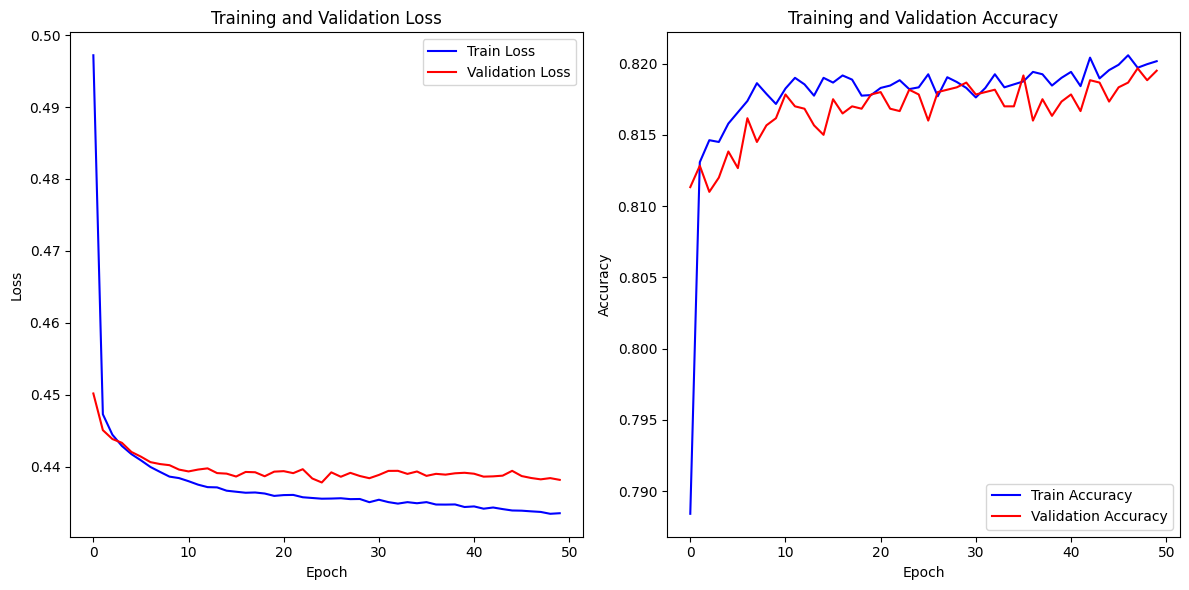

In [43]:
import matplotlib.pyplot as plt

# Obtener la pérdida y la precisión del entrenamiento y la validación desde history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Crear gráficos
plt.figure(figsize=(12, 6))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [44]:
import numpy as np

# datos de la 1 fila para comprobar 
datos = np.array([[10000, 2, 2,2,34,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000]])

# Escalar los datos
datos_scaled = scaler.transform(datos)

# Predicción de los datos
prediction = model.predict(datos)

# Un umbral para la predicción binaria
threshold = 0.5

# Obtener la probabilidad predicha
predicted_probability = prediction[0, 1]  

# Aplicar el umbral para obtener la predicción binaria
binary_prediction = 1 if predicted_probability > threshold else 0

# Mostrar la predicción binaria
print("Predicción:", binary_prediction)


1/1 [==============================] - ETA: 0s

c:\Users\LORE\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 163ms/step
Predicción: 0
